<a href="https://colab.research.google.com/github/JayashreeRchandra/SALARY-PREDICTION-USING-MACHINE-LEARNING/blob/main/Salary%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load the data which csv format

In [6]:
dataset=pd.read_csv("Salary_data.csv")

To view top 5 data

In [7]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Visualization of data

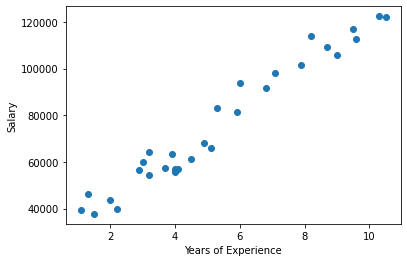

In [45]:
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

To select required column

In [12]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [13]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [14]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=101)

In [22]:
x_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [23]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [24]:
y_train

array([ 63218,  43525,  46205,  93940, 101302,  56957,  56642,  61111,
        39343,  98273,  39891,  64445,  57081,  57189,  67938, 121872,
       113812,  60150,  83088,  55794])

In [25]:
y_test

array([ 91738, 109431,  54445,  81363,  37731, 112635, 116969,  66029,
       105582, 122391])

LINEAR REGRESSION

In [26]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [27]:
LR.fit(x_train,y_train)

LinearRegression()

In [52]:
x_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [31]:
y_test

array([ 91738, 109431,  54445,  81363,  37731, 112635, 116969,  66029,
       105582, 122391])

In [28]:
y_pred_LR=LR.predict(x_test)

In [32]:
y_pred_LR

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [33]:
diff_LR=y_test-y_pred_LR

In [35]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original data','Diff']

In [36]:
res_df

,Prediction,Original data,Diff
0,91477.927966,91738,260.072034
1,109893.228025,109431,-462.228025
2,56585.780487,54445,-2140.780487
3,82754.891096,81363,-1391.891096
4,40108.933066,37731,-2377.933066
5,118616.264895,112635,-5981.264895
6,117647.038576,116969,-678.038576
7,75001.080545,66029,-8972.080545
8,112800.906981,105582,-7218.906981
9,125400.849127,122391,-3009.849127


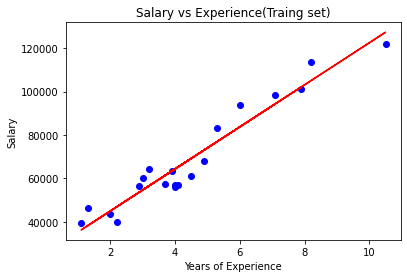

In [43]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Salary vs Experience(Traing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

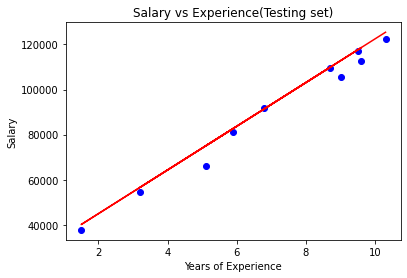

In [44]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,LR.predict(x_test),color='red')
plt.title('Salary vs Experience(Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

METRICS[MEANS SQUARE ERROR(MSE)]

In [48]:
from sklearn import metrics
R2=metrics.r2_score(y_test,y_pred_LR)

In [49]:
R2

0.974811112371526

Prediction of Salary after 9 years

In [50]:
LR.predict([[9]])

array([112800.90698129])